## make_mockobs_forPieterandBob

Script that runs the making mock observations scripts and output is specifically given to Pieter and Bob/ my paper.

In [2]:
%run 'make_mockobs.ipynb'

In [3]:
machine='chinook'

In [3]:
resolution = None;  # This should prompt the script to just use the lowest resolution 

slicewidth = 20; 
exptime = 1000.*60.*60.; 
CMOS = True; ROnoise= None; 
x_center = 50.5; y_center = 13.5

In [4]:
resolution = 14.; 

slicewidth = 20; 
exptime = 1000.*60.*60.; 
CMOS = True; ROnoise= None; 
x_center = 50.5; y_center = 13.5


****** Working on mock observation for distance 100Mpc ******
loading the data...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_14arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_14arcsec_20slwd.npz was saved as a tuple (len(data)==3), so we can return it with the resolution appended.
DEBUG: the resolution outputted from load_data is 14.0
extracting the FOV...
making a mask for the data


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The current mask is [[-0.5806065797805786 -0.5919966697692871 -0.600888192653656 ...,
  -1.6454010009765625 -1.6155669689178467 -1.5919708013534546]
 [-0.6411798596382141 -0.665644645690918 -0.6841400265693665 ...,
  -1.6740130186080933 -1.6450529098510742 -1.6181188821792603]
 [-0.6888850331306458 -0.7215476632118225 -0.7485681772232056 ...,
  -1.6977343559265137 -1.6709001064300537 -1.6441729068756104]
 ..., 
 [-1.5968893766403198 -1.6096631288528442 -1.6233278512954712 ...,
  -2.077497959136963 -2.0817222595214844 -2.0852274894714355]
 [-1.5916688442230225 -1.6033320426940918 -1.6147477626800537 ...,
  -2.07981014251709 -2.0846505165100098 -2.0889599323272705]
 [-1.586439609527588 -1.5970451831817627 -1.6060419082641602 ...,
  -2.083163261413574 -2.0884153842926025 -2.0931589603424072]]
adding noise to the data...
******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 14.0
DEBUGGIN

****** Done mock observation for distance 100Mpc ******



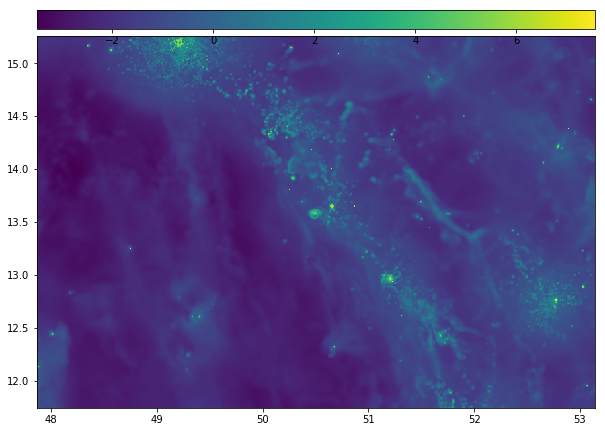

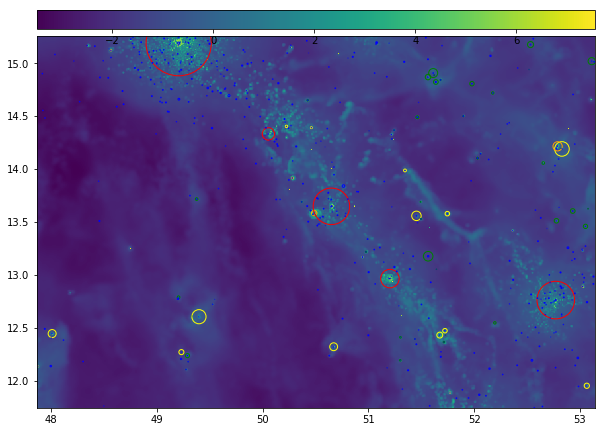

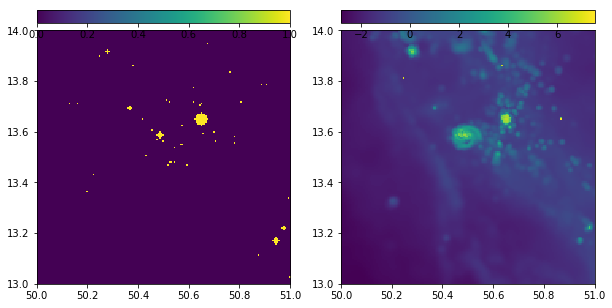

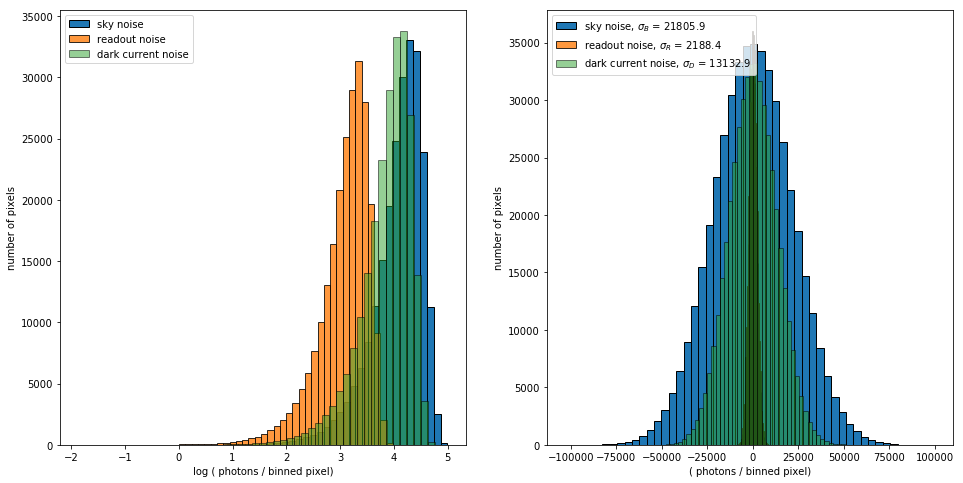

In [5]:
#distance = '500Mpc'
#data_FOV_500, xystarts_500, size_500, noiseadded_signal_500, B_sky_array_500, R_array_500,D_array500 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center)

#distance = '200Mpc'
#data_FOV_200, xystarts_200, size_200, noiseadded_signal_200, B_sky_array_200, R_array_200,D_array200 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center)

distance = '100Mpc'
data_FOV_100, xystarts_100, size_100, noiseadded_signal_100, B_sky_array_100, R_array_100,D_array100, mask = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center,mask=True,debug=True)

#distance = '50Mpc'
#data_FOV_50, xystarts_50, size_50, noiseadded_signal_50, B_sky_array_50, R_array_50,D_array50 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center)

(1688, 1124) (1688, 1124) (1688, 1124) (1688, 1124)


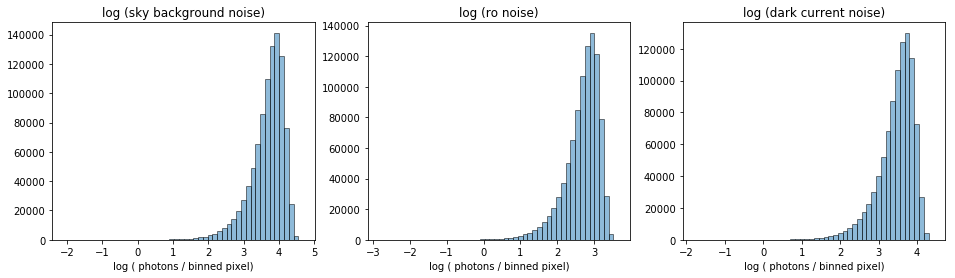

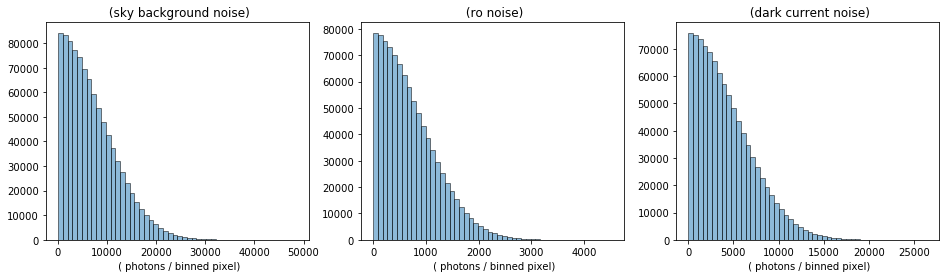

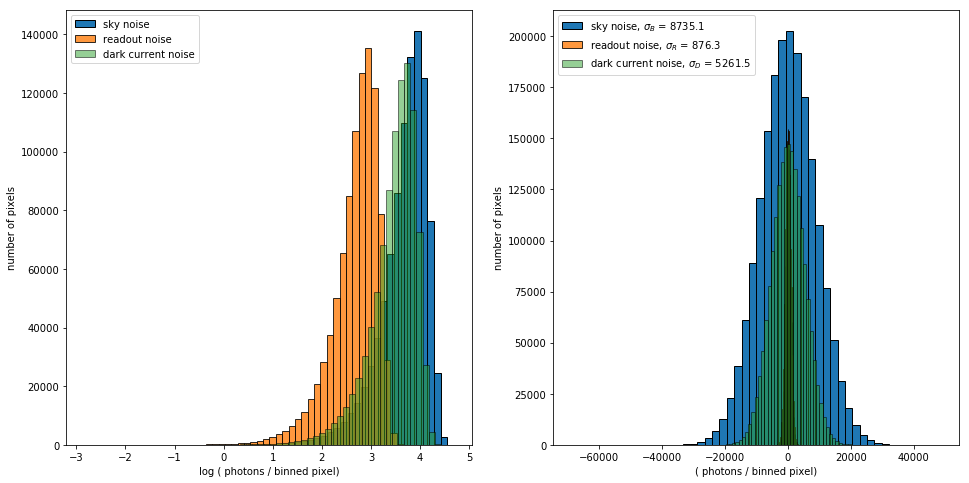

In [25]:
print data_FOV_100.shape, B_sky_array_100.shape, R_array_100.shape, D_array100.shape

plotchecks(B_sky_array_100, R_array_100, D_array100)

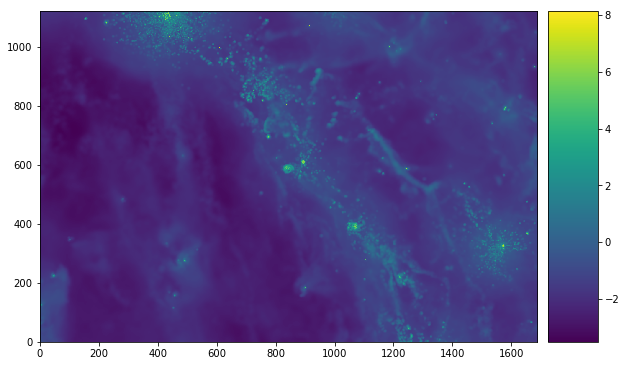

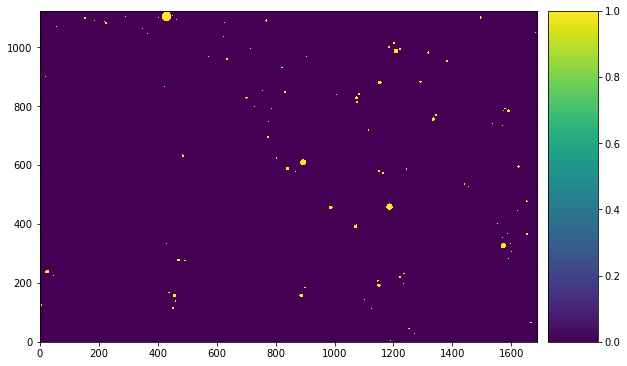

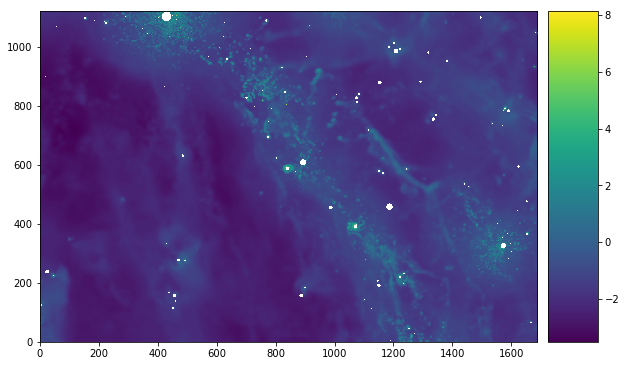

In [26]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(data_FOV_100.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(mask.T,ax=ax1,colorbar=True)#,bounds=bounds)

mx = np.ma.masked_array(data_FOV_100, mask=mask)
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(mx.T,ax=ax1,colorbar=True)#,bounds=bounds)

plt.savefig('first_masked_FOV_forobservation.png')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


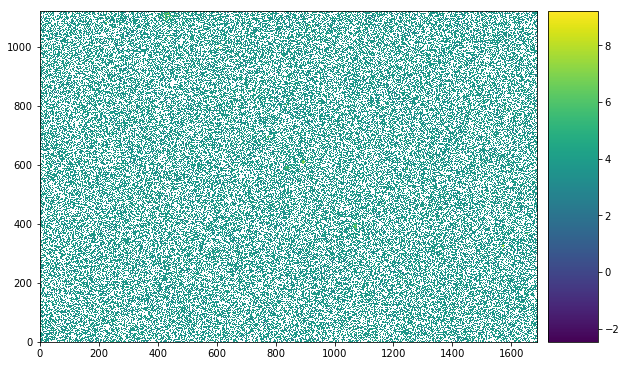

In [28]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(np.log10(noiseadded_signal_100).T,ax=ax1,colorbar=True)#,bounds=bounds)
